## Simulator


In [3]:
from components.agent import Agent
from algorithms.recurse_tree import recursive_build_tree
from algorithms.tpop import TPoP
import pandas as pd


In [6]:
#p_response = whatever comes out of the for loop
#p_claim = one of the three options: True, False or Unverifiable
p_accept = 1
p_reject = 0
p_ignore = 0

p_true = 0.5
p_false = 0.5
p_unverifiable  = 0

p_response = [p_accept, p_reject, p_ignore]
p_claim = [p_true, p_false, p_unverifiable]
#the bounds of the environment
environment_bounds=[[0, 1], [0,1]]

#tree architecture
depth = 1
n_d = [6, 0]

#N = number of agents in the simualtion
N= 20

threshold = 1

#agents_list contains all the agents in the simulation
agents_list = [Agent(p_response=p_response, p_claim=p_claim, environment_bounds=environment_bounds) for _ in range(N)]

#agents_dict contains as keys the agents' positions, and the agent instance as the value. 
agent_dictionary = {(agent.x_position, agent.y_position):agent for agent in agents_list}

In [3]:
from simulation_tools.simulator import simulator
threshold = 1
p_response = [p_accept, p_reject, p_ignore]
p_claim = [p_true, p_false, p_unverifiable]
agents = [agents_list, agent_dictionary]
df = simulator(p_response, p_claim, depth, n_d, threshold, agents, N)

In [4]:
df

,p_accept,p_reject,p_ignore,p_true,p_false,p_unverifiable,valid_tree,responses_sum,algorithm output
0,1,0,0,0.5,0.5,0,False,NaN,False
1,1,0,0,0.5,0.5,0,True,6.0,True
2,1,0,0,0.5,0.5,0,True,6.0,True
3,1,0,0,0.5,0.5,0,True,6.0,True
4,1,0,0,0.5,0.5,0,False,NaN,False
5,1,0,0,0.5,0.5,0,True,6.0,True
6,1,0,0,0.5,0.5,0,True,6.0,True
7,1,0,0,0.5,0.5,0,True,6.0,True
8,1,0,0,0.5,0.5,0,False,NaN,False
9,1,0,0,0.5,0.5,0,True,6.0,True


In [8]:
from algorithms.tpop import classifier
from simulation_tools.results import results

#TODO: pass the classifier through the df that is the output of the simulator
#Correct the results function because the comparison is incorrect

In [10]:
from simulation_tools.simulator import simulator
p_true = 1
p_false = 0
p_unverifiable = 0
p_claim = [p_true, p_false, p_unverifiable]
N=200
environment_bounds=[[0, 1], [0,1]]

n_d = [2, 2, 0]
h = 2
t = 0

dfs = []
for p_accept in range(0, 110, 10):

    remainder = 100 - p_accept
    for p_reject in range(0, remainder +10, 10):
        p_ignore = 100-p_reject-p_accept
        p_response = [p_accept, p_reject, p_ignore]
        assert sum(p_response) == 100
        p_response = [p_accept/100, p_reject/100, p_ignore/100]

        #agents_list contains all the agents in the simulation
        agents_list = [Agent(p_response=p_response, p_claim=p_claim, environment_bounds=environment_bounds) for _ in range(N)]

        #agents_dict contains as keys the agents' positions, and the agent instance as the value. 
        agent_dictionary = {(agent.x_position, agent.y_position):agent for agent in agents_list}
        agents = [agents_list, agent_dictionary]
        
        df = simulator(p_response , p_claim, h, n_d, t, agents, N)
        
        dfs.append(df)     
combined_df = pd.concat(dfs)
print(combined_df)




     p_accept  p_reject  p_ignore  p_true  p_false  p_unverifiable  \
0         0.0       0.0       1.0       1        0               0   
1         0.0       0.0       1.0       1        0               0   
2         0.0       0.0       1.0       1        0               0   
3         0.0       0.0       1.0       1        0               0   
4         0.0       0.0       1.0       1        0               0   
..        ...       ...       ...     ...      ...             ...   
195       1.0       0.0       0.0       1        0               0   
196       1.0       0.0       0.0       1        0               0   
197       1.0       0.0       0.0       1        0               0   
198       1.0       0.0       0.0       1        0               0   
199       1.0       0.0       0.0       1        0               0   

     valid_tree  responses_sum  algorithm output  
0          True            0.0              True  
1          True            0.0              True  
2     

In [17]:
df = combined_df
# Filter valid trees and drop NaNs
filtered_df = df[df["valid_tree"] == True].copy()
filtered_df = filtered_df.dropna(subset=["responses_sum"])
print(filtered_df["responses_sum"].dtype)
print(filtered_df["responses_sum"].head(10))

# Check suspect rows
suspect_rows = combined_df[(combined_df["valid_tree"] == True) & (combined_df["responses_sum"].isnull())]
print("Rows with valid_tree == True but responses_sum is null:")
print(suspect_rows)



float64
0     0.0
1     0.0
2     0.0
3     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: responses_sum, dtype: float64
Rows with valid_tree == True but responses_sum is null:
Empty DataFrame
Columns: [p_accept, p_reject, p_ignore, p_true, p_false, p_unverifiable, valid_tree, responses_sum]
Index: []


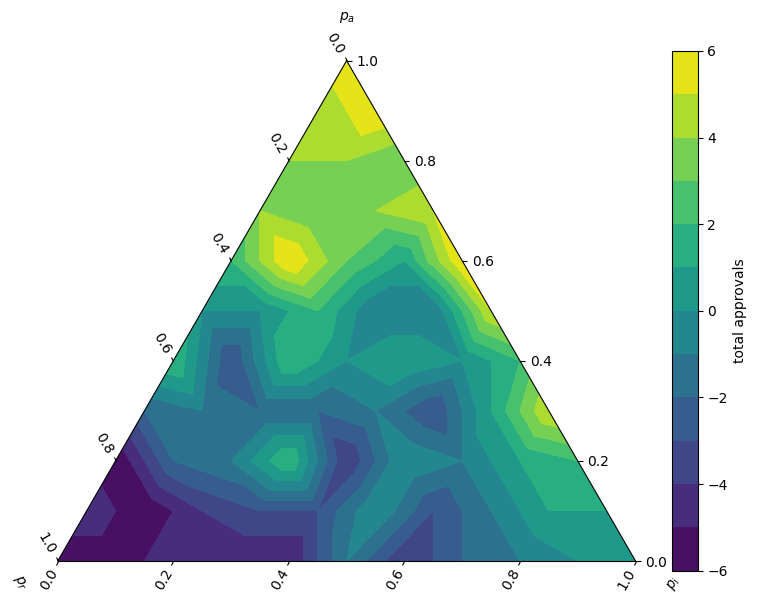

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import mpltern

# Loading CSV
#df = pd.read_csv("/Users/amm3117/Desktop/TPoP 3/Code/tree-consensus/tree-consensus-algoritms/agent-based-simulations/n200_combined_df.csv")  # Update path as needed
df = combined_df


# Filter valid trees and drop NaNs
filtered_df = df[df["valid_tree"] == True].copy()
filtered_df = filtered_df.dropna(subset=["responses_sum"])

# Extract values
a = filtered_df["p_accept"].values
b = filtered_df["p_reject"].values
c = filtered_df["p_ignore"].values
z = filtered_df["responses_sum"].values

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='ternary')

t = ax.tricontourf(a, b, c, z, levels=12, cmap="viridis")

ax.set_tlabel(r'$p_a$')
ax.set_llabel(r'$p_r$')
ax.set_rlabel(r'$p_i$')
#ax.set_title("Ternary Contour Plot (responses_sum | valid_tree=True)")

fig.colorbar(t, ax=ax, label="total approvals")
plt.tight_layout()
plt.show()


In [14]:
def e_approvals(branching_factor, height, prob_accept, prob_reject):
    #parents per depth level array
    N_d_array = []
    for d in range(len(branching_factor)):

        neighbours  = branching_factor[:d]
        N_d = 1
        for n in neighbours:
            N_d = N_d * n
            
        N_d_array.append(N_d)

    rho = prob_accept - prob_reject


    approvals_array = [N_d_array[d]*n_d[d]*rho for d in range(height)]
    expected_tree_approvals = sum(approvals_array)
    return expected_tree_approvals


In [15]:
def v_simulator(p_response, p_claim, v) -> pd.DataFrame:
    '''
    dimensions = [depth, n_d]
    p_response = [p_accept, p_reject, p_ignore]
    p_claim = [p_true, p_false, p_unverifiable]

    '''
    
    #depth, n_d = dimensions
    p_accept, p_reject, p_ignore = p_response
    p_true, p_false, p_unverifiable = p_claim

    responses_sum = v
    

    data = []
    
        
        
        
    data.append({
        'p_accept': p_accept,
        'p_reject': p_reject,
        'p_ignore': p_ignore,
        'p_true': p_true,
        'p_false': p_false,
        'p_unverifiable': p_unverifiable,
        'expected responses sum': responses_sum
    })
    df = pd.DataFrame(data)
    
    return df

In [16]:
depth = 3
n_d = [2, 2, 3]
p_claim = [p_true, p_false, p_unverifiable]

dfs = []

for p_accept in range(0, 110, 10):

    remainder = 100 - p_accept
    for p_reject in range(0, remainder +10, 10):
        p_ignore = 100-p_reject-p_accept
        p_response = [p_accept, p_reject, p_ignore]
        assert sum(p_response) == 100
        p_response = [p_accept/100, p_reject/100, p_ignore/100]
        rho = (p_accept/100) - (p_reject/100)
        v = e_approvals(n_d, depth, p_accept/100, p_reject/100)
        df = v_simulator(p_response, p_claim, v)
        dfs.append(df)
combined_df = pd.concat(dfs)
print(combined_df)




    p_accept  p_reject  p_ignore  p_true  p_false  p_unverifiable  \
0        0.0       0.0       1.0     0.5      0.5               0   
0        0.0       0.1       0.9     0.5      0.5               0   
0        0.0       0.2       0.8     0.5      0.5               0   
0        0.0       0.3       0.7     0.5      0.5               0   
0        0.0       0.4       0.6     0.5      0.5               0   
..       ...       ...       ...     ...      ...             ...   
0        0.8       0.1       0.1     0.5      0.5               0   
0        0.8       0.2       0.0     0.5      0.5               0   
0        0.9       0.0       0.1     0.5      0.5               0   
0        0.9       0.1       0.0     0.5      0.5               0   
0        1.0       0.0       0.0     0.5      0.5               0   

    expected responses sum  
0                      0.0  
0                     -1.8  
0                     -3.6  
0                     -5.4  
0                     -7.2

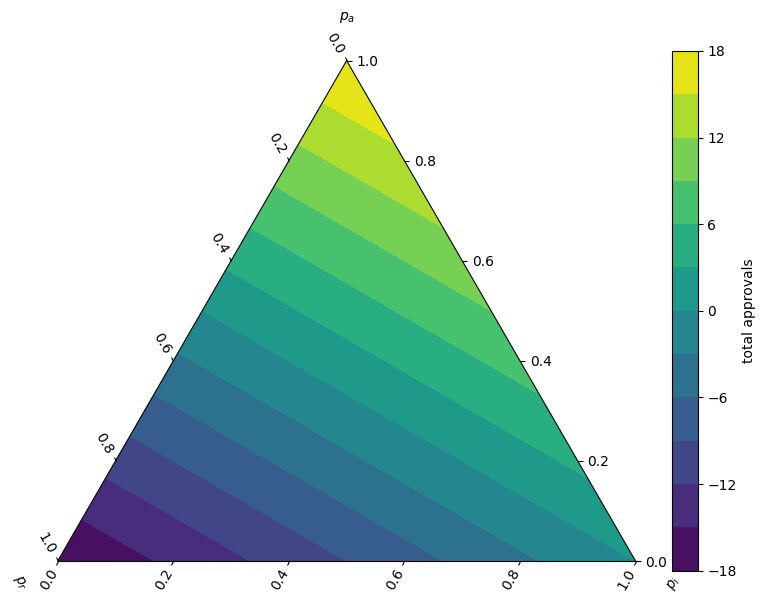

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mpltern

# Loading CSV

df = combined_df


# Extract values
a = combined_df["p_accept"].values
b = combined_df["p_reject"].values
c = combined_df["p_ignore"].values
z = combined_df["expected responses sum"].values

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='ternary')

t = ax.tricontourf(a, b, c, z, levels=12, cmap="viridis")

ax.set_tlabel(r'$p_a$')
ax.set_llabel(r'$p_r$')
ax.set_rlabel(r'$p_i$')
#ax.set_title("Ternary Contour Plot (responses_sum | valid_tree=True)")

fig.colorbar(t, ax=ax, label="total approvals")
plt.tight_layout()
plt.show()